<img id="top" style="float:left;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>

<center>
    <h3 style="text-align:center;color:#888888;"> 
        <i>--  Cours/Projet - AERO-I3 --</i></h3>
<h1> Mécanique Spatiale </h1>
<h3> Step 1 - Quitter la terre </h3>
<h4> Le Lanceur et le lancement  </h4>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

<img style="width:60%;margin:auto;" src="https://hpp.education/Lessons/MecaSpace/bannerlaunch.jpg" />

L'objectif de cette séance est d'étudier la trajectoire terrestre contenant la phase de lancement d'un objet céleste (sonde ou satellite) devant quitter l'orbite terrestre. Il s'agit de comprendre les éléments importants intervenant dans le pré-dimensionement d'un lanceur et les contraintes engendrées par l'extraction de l'atmosphère terrestrte.





In [14]:
import numpy as np
import pandas as pd
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Option pour afficher les figures dans le notebook et eviter le plt.show():
%matplotlib inline  
fs=16
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)

In [27]:
# Constante célestes:
G=6.67408e-11 # Constante de gravitation - 
Rt=6380000 # Rayon terrestre - m
Ms=1.9884e30 # Masse du soleil - kg
Mt=5.9722e24 # Masse de la terre - kg
a_t=1.496e11 # demi grand axe orbite terrestre - m
a_s= 1.426e12 # demi grand axe orbite saturne - m
g0=9.81

<h1> 1 - Quitter l'attraction terrestre </h1>

On rapelle rapidement que la seconde loi de Newton appliquée à un objet soumis à une seule force de gravitation permet de retrouver la 3eme Loi de Kepler:

$$
\dfrac{T^2}{a^3}=\dfrac{4\pi^2}{\mu}
$$

La vitesse d'injection sur une orbite ayant pour périgée $r_p$ et pour demi grand axe $a$ est donnée par:
$$
V_p^2=2\mu \left(\dfrac{1}{r_p}-\dfrac{1}{2a}\right)
$$


A partir de cette formule, calculer les vitesses suivantes:

* $V_s$ Vitesse de l'orbite circulaire à $200$km d'altitude. ($a=r=R_t+z$)
* $V_g$ Vitesse d'injection sur l'orbite de tranfert géostationnaire GTO ($r=R_t+400$km et $T=86164$s).
* $V_l$ Vitesse qu'un objet doit acquérir pour quitter l'orbite terrestre à $222$km d'altitude. ($a\rightarrow \infty$)

In [16]:
Vs=...;print('Vs=',Vs)
T=86164
aGO=...
Vg=...;print('Vg=',Vg)
Vl=...;print('Vl=',Vl)

Vs= Ellipsis
Vg= Ellipsis
Vl= Ellipsis


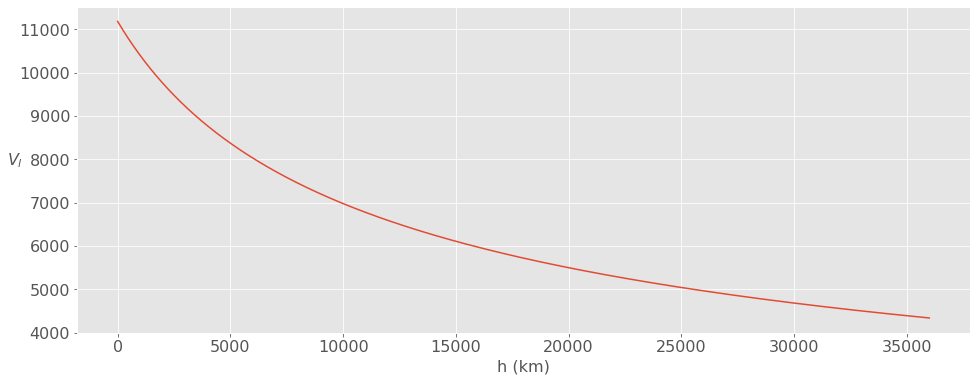

In [23]:
fig=plt.figure(figsize=(16,6))
z=np.arange(0,36000e3,1000)
plt.plot(z/1000,np.sqrt(2*G*Mt/(Rt+z)))
plt.ylabel('$V_l$',fontsize=fs,rotation=0);plt.xlabel('h (km)',fontsize=fs);

In [8]:
2*np.pi*a_t/(60*60*24*365)

29288.059365658268

In [29]:
np.sqrt(a_t**3*4*np.pi**2/(G*Ms))/T

366.2720889112031

# 2 - Propulsion

## 2.1 - Impulsion spécifique

Pour atteindre de telles vitesses, il est nécessaire d'apporter de l'énergie au système. Pour ce faire, on utilise des moteurs spatiaux pouvant utiliser différentes technologies. Un paramètre important permettant de caractériser cette technologie est l'impulsion spécifique. Cette grandeur correspond à un temps (en seconde) et correspond au ratio entre la poussé produite (En Newton) et le poid d'ergol (ou de carburant) consommé par seconde (Newton/secondes):

$$
ISP=\dfrac{F_p}{qg_0}
$$

En pratique, plus l'impulsion spécifique est grande plus le moteur est performant. A poussé égale, le moteur ayant la plus grande ISP consommera moin de carburant et a consommation égale, le moteur ayant la plus grande ISP produira la plus forte poussé.

Pour permettre une comparaison fiable, on donne souvent une valeur de l'ISP dans le vide et on utilise les grandeur au niveau de la mer ($g_0=\mu/R_t^2$). Ainsi la poussé d'un moteur spatial est souvent notée:

$$
F_p=qV_e=qg_0I_{sp}=-\dfrac{dm}{dt}g_0I_{sp}
$$

**Attention:** Pour le pré-dimensionement des missions spatiales dans vos projets, l'ISP d'un moteur de technologie donnée est mesurée sur terre. Ainsi la valeur de l'ISP fourni sera toujours associée à la valeur de $g_0$ de la terre même si ce moteur est utilisé sur une autre planète. 

Voici la répartition des différentes <a href="https://thephysicsofspacex.files.wordpress.com/2016/07/upper-stage-graph-postable-1-corrected.png?w=800"> technologies </a> en fonction de leur ISP et de leur masse:

In [2]:
Engines=pd.read_csv('Rocket_Engines.dat',delimiter=' ')
fig=px.scatter(Engines, x="ISP(s)", y="Mass(kg)", color="Combustion",log_y=True,text='Name',
           color_discrete_sequence=["blue","green", "gray", "goldenrod", "red"])
fig.update_traces(textposition='top left',textfont=dict(color='#E58606'))


**Question** :
* Le premier étage d'un lanceur est constitué de 3 moteurs: 2 moteurs d'ISP $I_1$ et de débit $q_1$ puis 1 autre moteur d'ISP $I_2$ et de débit $q_2$. **Calculer l'impulsion spécifique équivalente du premier étage**

Application numérique: $I_1=276$s, $I_2=430$s et $q_1=1830 $kg/s, $q_2=320 $kg/s.

In [ ]:
I1,I2=276,430
q1,q2=1830,320
qt=2*q1+q2
Ieq=...
print("Ieq=",Ieq)

## 2.2 - Relation de Tsiolkovsky

Pour le dimensionnement d'un lanceur, il est utile de pouvoir relier la puissance disponible en terme de technologie et de propulsion (ISP) et le différentiel de vitesse que l'on souhaite donner à notre système. Pour ça on intègre la poussé sur toute la durée du vol (entre l'état initial et l'état final), c'est la relation de Tsiolkovsky:
$$ 
\Delta V_p = \int_{i}^{f} \dfrac{F_p}{m} dt = - \int_{i}^{f} g_0 I_{sp}\dfrac{dm}{m} dt
$$

Soit après intégration:
$$
\Delta V_p= g_0 I_{sp} ln\left( \dfrac{m_i}{m_f}\right)
$$

Calculer la masse totale d'un étage de lanceur ayant une vitesse initiale de 7.178 km/s, propulsé par le moteur vinci permettant de mettre 10 tonnes en orbite géostationnaire.

In [ ]:
g0=...
dv=...
mf=...
mi=...
print('mi=',mi)

**Remarque:** Dans le référentiel terrestre, l'atmosphère tourne avec la terre, il faut donc distinguer la vitesse par rapport à l'atmosphère et la vitesse par rapport au corps terrestre. La différence dépend bien sûr de la Lattitude $\phi$ du lancement:

$$
V_{init}=\dfrac{2\pi R_t \cos(\phi)}{86400}
$$

En considérant un même lanceur de 100 tonnes au décollage à Baïkonour ($\phi=45.9202$) et à Kourou ($\phi=5.1597$), quelle masse suplémentaire peut-on mettre en orbite géostationnaire en tirant de Kourou ?

In [ ]:
Vinit_kourou=...
Vinit_baik=...
mi=...
dvk=Vg-Vinit_kourou
dvb=Vg-Vinit_baik
print('mfk=',...)
print('mfb=',...)

Commentaires ?






---


On indique dans le tableau suivant les vitesses initiales de différents sites de lancement:

<table style="width:800px;font-size:16pt;">
    <tr><th style="border-radius:10px 0 0 0;">Base</th><th>Lattitude (°)</th><th style="border-radius:0 10px 0 0;">$V_{init}$ (m/s)</th></tr>
    <tr><td> Kourou <b>🇪🇺</b></td><td>5.1597</td><td>462</td></tr>
    <tr><td> Baïkonour <b>🇷🇺</b></td><td>45.9202</td><td>322.76</td></tr>
    <tr><td>Cap Canaveral <b>🇺🇸</b> </td><td>28.3922</td><td>408.15</td></tr>
    <tr><td> Wenchang <b>🇨🇳</b> </td><td>19.6225</td><td>437</td></tr>
    <tr><td>Xichang <b>🇨🇳</b> </td><td>23.2560</td><td>426</td></tr>
    </table>

## 2.3 Temps d'Allumage 

Une application importante de la relation de Tsiolkovsky réside dans la détermination du temps de propulsion. En effet, d'un point de vue pratique le $\Delta V$ d'une manoeuvre orbitale est souvent traduit en temps de fonctionement. Il faut donc déterminer le temps $T_f$ de fonctionnement nécessaire à un moteur pour fournir un $\Delta V$ donné. Montrer que l'on a la relation suivante:

$$
T_f=\dfrac{m_e}{q_m}(k+1)\left(1-e^{\frac{-\Delta V}{g_0 ISP}} \right)
$$

Avec $k=\frac{M_s}{M_e}$ l'indice constructif d'un étage, caratérisant la technologie utilisé pour la fabrication de l'étage.


**Application** : Calculer le temps d'allumage du troisième étage de la fusée <a href="https://fr.wikipedia.org/wiki/Saturn_V">Saturne V</a> pour effectuer l'injection translunaire (<a href="https://en.wikipedia.org/wiki/Trans-lunar_injection">TLI</a>) $\Delta V_{TLI}=2800$m/s.

Le troisième étage de Saturne V est constitué au moment de la TLI de $89$ tonnes d'ergols alimentant un moteur <a href="https://fr.wikipedia.org/wiki/J-2_(moteur-fus%C3%A9e)">J2</a>  ayant pour $ISP=421$s et pour débit massique $q_m=204$ kg/s. La masse "sèche" restante représente environ $M_s=44$ tonnes.

In [ ]:
dv=...
me=...
ISP=...
qm=...
k=...
Tf=...

**Pour résumer**, l'équation de Tsiolkovsky peut s'utiliser pour calculer la masse de carburant nécessaire à une manoeuvre $\Delta V$ soit en connaissant la masse **avant manoeuvre $M_i$**:

$$
\delta m = M_i\left(1-e^{\frac{-\Delta V}{g_0 ISP}} \right)
$$

soit en connaissant la masse **après manoeuvre $M_f$**:

$$
\delta m = M_f\left(e^{\frac{\Delta V}{g_0 ISP}} - 1 \right)
$$

<h2> 2.4 - Contraintes </h2>

Lors de la phase de prédimensionnement, on peut considérer les contraintes extérieures comme les forces aérodynamique et le poids comme des pertes de $\Delta V$:

$$
\Delta V_{tot}=\Delta V_p + \Delta V_{pertes}
$$

En pratique, ces pertes correspondent au $\Delta V$ nécessaire pour vaincre les résistances due à l'atmosphère et aux perturbations exterieures. On estime en générale ces pertes à 20% de $\Delta V_p$ ( Mais cela dépend fortement du choix de la trajectoire dans la phase atmosphérique). 

Calculer les $\Delta V$ réels correspondant aux vitesses $V_s$ $V_g$ et $V_l$ calculées précédemment:

In [ ]:
print('Vs=',...)
print('Vg=',...)
print('Vl=',...)

<h1> 3 - Etagement </h1>

En notant $M_s$ la masse des structures, $M_e$ la masse d'ergols, $M_{sup}$ la masse des étages supérieurs et $M_{cu}$ la masse de la charge utile, on a:

Masse initiale $$ M_i=M_s+M_e+M_{sup}+M_{cu} $$
Masse finale $$ M_f=M_s+M_{sup}+M_{cu} $$

Indice constructif: $k=\dfrac{M_s}{M_e}$

Rechercher sur internet l'ordre de grandeur de $k$ pour un étage de lanceur actuel.

<h2> Cas Mono-étage</h2>

Imaginons maintenant un lanceur d'un seul étage et négligeont la masse de la charge utile. On a donc:

$$ M_i=M_s+M_e=(1+\frac{1}{k})M_s $$
$$ M_f=M_s $$

Que devient la relation de Tsiolkovsky dans ce cas ?
En déduire la vitesse maximale atteignable par un lanceur monoétage. Que peut-on en déduire ?

In [ ]:
dvmax=...
print(dvmax)

Si on s'interesse à la quantité d'ergol nécessaire à un lanceur mono-étage, on a:

$$
\dfrac{M_{initiale}}{M_{finale}}=\dfrac{M_e+M_s+M_{cu}}{M_s+M_{cu}}=exp\left(\dfrac{\Delta V}{g_0 I_{sp}} \right)
$$

Montrer que la masse d'ergol peut s'écrire:

$$
M_e=\dfrac{M_{cu}E}{1-kE}
$$

avec

$$
E=\left(e^{\Delta V/g_0 I_{sp}} -1\right)
$$

Calculer la masse théorique de carburant nécessaire à un lanceur pouvant mettre une masse de 10 kg en orbite basse ($200$km). (On prendra un ISP de 380).

In [ ]:
mcu=..
ISP=...
dv=...
print('me=',...)



<h2> Cas multi-étages </h2>


Tentons maintenant de ragarder l'évolution du rapport entre la masse injectée en orbite  et la masse au décollage en fonction du nombre d'étage.

Considérons un lanceur de $N$ étages et notons $M_N$ la masse des $N$ étages cumulés. Dans ce cas, $M_0$ représentera la masse finale à mettre en orbtire (La charge utile). En partant de là, on peut écrire que la masse de $n$ étages $M_n$ c'est la masse de $n-1$ étages et la masse de l'étage $n$ qui est constitué d'une masse de carburant $M_e$ et d'une masse de structure $M_s$. On a donc:

$$
M_n=M_{n-1}+M_e+M_s=M_{n-1}+(1+k)M_e
$$

d'ou:
$$
M_e=\dfrac{M_n-M_{n-1}}{1+k}
$$

D'autre part, la relation de Tsiolkovsky permet d'écrire:

$$
\dfrac{M_n-M_e}{M_n}=e^{-\delta v/g_0 I_{sp}}
$$

avec $\delta v$ l'apport de vitesse d'un étage. En combinant les deux relations, on arrive à:

$$
\dfrac{M_{n-1}}{M_n}=(1+k)e^{-\delta v/g_0 I_{sp}}-k
$$


Ainsi la rapport $M_{0}/M_n$ s'éxprime simplement:

$$
\dfrac{M_{0}}{M_n}=\dfrac{M_{0}}{M_1} \dfrac{M_{1}}{M_{2}} ... \dfrac{M_{n-1}}{M_{n}} = \prod_{i=1}^{N}\dfrac{M_{i-1}}{M_{i}}
$$

En faisant l'hypothèse que tous les étages sont de même technologie (même ISP et même indice constructif), on a:

$$
\dfrac{M_0}{M_n}= \left[\dfrac{M_{n-1}}{M_{n}}\right]^n
$$

Ainsi, en considérant que l'apport total de vitesse du lanceur $\Delta V=n\delta v$, on obtient:

$$
\dfrac{M_n}{M_{0}}=\left[\dfrac{M_{n-1}}{M_{n}}\right]^{-n}=\left[(1+k)exp\left(\dfrac{-\Delta V}{n.g_0.I_{sp}}\right)-k\right]^{-n}
$$

On peux alors représenter l'évolution de la masse d'un lanceur de $n$ étages $M_n$ en fonction du nombre d'étage pour une mise en orbite de $M_0=1$kg en géostationnaire par exemple ($\Delta V=12500$m/s).

In [ ]:
g0=9.81
DV=12500
ISP=380
M0=1
N=np.arange(1.,6,0.1)
K=[0.08,0.09,0.1]
Mn=np.zeros((len(N),len(K)))
for i,n in enumerate(N):
    for j,k in enumerate(K):
        Mn[i,j]=((1+k)*np.exp(-DV/(n*g0*ISP))-k)**-n
            
plt.figure(figsize=(6,3),dpi=120)
plt.plot(N,Mn)
plt.legend(K,fontsize=fs)
plt.ylim([0,200]);
plt.grid(True)

Que remarquez vous ?


---


**Note:** En pratique, la multiplication des étages rajoute des risques de problème à l'allumage et à la séparation. Ainsi on se limite souvent à 3 voir 4 étages au maximum.

Prenons le cas d'Ariane 5:

<table style="font-size:20px;">
    <tr><th style="border-radius:10px 0 0 0;">Etage</th><th>Nom</th><th>Moteur</th><th>Type d'ergols</th><th>$M_s$ (tonnes)</th><th>$M_e$ (tonnes)</th><th>k</th><th>ISP (s)</th><th style="border-radius:0 10px 0 0;">$\Delta V$ (m/s)</th></tr>
    <tr><td>Appoint</td><td>EAP</td><td>P230 (x2)</td><td>Solide</td><td>80</td><td>460</td><td>0.17</td><td>276</td><td>2910</td></tr>
    <tr><td>1</td><td>EPC</td><td>Vulcain 2</td><td>Liquide</td><td>15</td><td>170</td><td>0.09</td><td>430</td><td>5978</td></tr>
    <tr><td>2</td><td>ECA</td><td>HM7B</td><td>Liquide</td><td>3.5</td><td>14.5</td><td>0.24</td><td>445</td><td>2815</td></tr>
     <tr><td>Total</td><td> </td><td> </td><td> </td><td>88.5</td><td>644.5</td><td>0.137</td><td> </td><td>11703</td></tr>
</table>

Recalculer les $\Delta V$ obtenus par la relation de Tsiolkovsky pour une charge utile de 10 tonnes. Commentez.

In [ ]:
ISP=276;rm=...;dv=...
ISP=430;rm=...;dv=...
ISP=445;rm=...;dv=...

Pour Ariane 6, on a (à compléter):

<table style="font-size:20px;">
    <tr><th style="border-radius:10px 0 0 0;">Etage</th><th>Nom</th><th>Moteur</th><th>Type d'ergols</th><th>$M_s$ (tonnes)</th><th>$M_e$ (tonnes)</th><th>k</th><th>ISP (s)</th><th style="border-radius:0 10px 0 0;">$\Delta V$ (m/s)</th></tr>
    <tr><td>Appoint</td><td>ESR </td><td>P120 x2 ou x4</td><td>Solide</td><td>11 ?</td><td>143.6</td><td>0.075</td><td>279</td><td>?</td></tr>
    <tr><td>1</td><td>LLPM </td><td>Vulcain 2.1</td><td>Liquide</td><td>?</td><td>?</td><td>?</td><td>437</td><td>?</td></tr>
    <tr><td>2</td><td>ULPM </td><td>Vinci</td><td>Liquide</td><td>?</td><td>?</td><td>0.24</td><td>465</td><td>?</td></tr>
</table>

## Dimensionement d'une mission

Maintenant nous sommes capable de construire une fonction qui transforme une suite de $\Delta V$ en consommation de carburant. Cela peut être utile lors du pré-dimensionement d'une mission spatiale. On veut également identifier les caractéristiques propulsives de chaque phase de la mission, c'est à dire identifier le type de propulsion utilisé pour fournir chaque $\Delta V$ (son ISP). Ainsi on peut utiliser l'estimation de la masse de carburant vue plus haut pour calculer la masse de la "sonde" à l'étape $n$ en fonction de sa masse à l'étape $n-1$:

$$
M_n=M_{n-1}\left[(1+k)exp\left(\dfrac{-\delta v}{g_0.I_{sp}}\right)-k\right]^{-1}
$$


In [ ]:
 def ergol_mass(M0,DV,isp,k):
    g0=9.81
    Mn=M0*1.0
    for i,dv in enumerate(DV):
        e=np.exp(-dv/(g0*isp[i]))
        Mn=Mn*((1+k[i])*e-k[i])**-1
        print(Mn)
    return Mn

Il faut alors lister l'ensemble des manoeuvres nécessaires à la mission en partant de la fin et identifier pour chaque phase, quel moteur est utilisé et s'il y a séparation d'un étage ($k\neq 0$) ou non ($k=0$).


In [ ]:
# Example pour le lanceur Ariane-5:
DV=[?,?,?]
ISP=[?,?,?]
k=[?,?,?]

In [ ]:
Mi=ergol_mass(1,DV,ISP,k)
print(Mi)

<h1> 4 - Application: Atteindre l'orbite basse </h1>

On se propose dans cette partie de calculer numériquement la trajectoire du lanceur dans la phase atmosphérique (h<200km) soumis à son poid $\mathbf{P}(t)=m(t)\mathbf{g}$, à une force de poussée $F_p$ et aux forces aérodynamiques de trainée et de portance $\mathbf{F_D}$ et $\mathbf{F_L}$.

Le principe fondamental de la dynamique appliqué au lanceur donne:

$$
\dfrac{d\mathbf{p}}{dt}=\dfrac{dm\mathbf{U}}{dt}=\mathbf{F_P}+\mathbf{P}+\mathbf{F_D}+\mathbf{F_L}
$$

Avec $\mathbf{U}=\left(\begin{array}{c}  u_x \\ u_y \end{array}\right)$ et $U=\lVert{\mathbf{U}}\lVert$.

On notera ici que le principe fondamentale de la dynamique tient bien compte de la variation de la masse en fonction du temps. Soit:

$$
\dfrac{dm\mathbf{U}}{dt}=m\dfrac{d\mathbf{U}}{dt}+\mathbf{U}\dfrac{dm}{dt}=m\mathbf{a}+\mathbf{U}q_m
$$

Où $q_m$ représente le débit massique. Les forces extérieures sont ici: 

$$F_D=\dfrac{1}{2}\rho U^2 S C_d$$
$$F_L=\dfrac{1}{2}\rho U^2 S C_l$$


On utilisera ici le repère géocentrique 2D en coordonées polaire $(r,\theta)$.

Pour intégrer ces équations et faire varier les caractéristiques technologiques facilement, on utilise le module <a href="https://hpp.education/Lessons/MecaSpace/">*SOLSTICE*</a> qui est fourni et qui servira dans les prochaines séances. L'utilisation de ce module est décrite dans un <a href="https://hpp.education/Lessons/MecaSpace/Files/MecaSpace_SOLSTICE.html">notebook dédié</a>.

On importe directement le module:

In [ ]:
import SOLSTICE as Orb

On va ici utiliser un lanceur mono-étage de 3m de haut et de 25 cm de diamètre utilisant un moteur ayant pour ISP $380$s et pour débit massique $430$g/s. On prendra comme indice constructif $k_s=0.075$.


**Quelle masse de carburant doit-on emporter pour mettre une charge utile de 1kg en orbite circulaire à 200km ?**

In [ ]:
k=0.075
dv=...
mu=1
ISP=...
E=np.exp(dv/(g0*ISP))-1
mc=mu*E/(1-k*E)
print('mc',mc)

On va maintenant calculer la trajectoire du lanceur à l'aide de l'outil SOLSTICE:

In [ ]:
Lanceur=Orb.Stage(D=0.25,H=3,IC=0.075,ISP=380,qm=0.43,mc=mc,gamma0=-90)
Lanceur.engine_start()
Lanceur.check_thrust()

In [ ]:
#########################################################
##################### LANCEMENT #########################
#########################################################
### Passage en mode contrainte pour le décollage ########
Lanceur.mode='const'
Lanceur.gamma_const=-np.pi/2.
Lanceur.display=False
######## Phase 1 : Sortie des couches denses atmo #######
Lanceur.run(dt=0.001,ntmax=147*1000)
# Passage en mode libre
Lanceur.mode='free'
####### Phase 2 : Prise de vitesse tangentielle #########
Lanceur.gamma=-np.pi/3
Lanceur.run(dt=0.001,ntmax=2.*1000)
######### Phase 3 : Accélération tangentielle ###########
Lanceur.gamma=-np.pi/20.
Lanceur.run(dt=0.001,ntmax=5*1000)
###############  Phase 4 : Mise à poste #################
Lanceur.gamma=0.
Lanceur.display=True
Lanceur.run(dt=0.001,ntmax=12.50*1000)
Lanceur.gamma=0.
Lanceur.engine_stop()

Après avoir atteint l'orbite, utiliser la fonction monit pour analyser la trajectoire et retrouver les 4 phases de la trajectoire. 

In [ ]:
Lanceur.monit(plt.figure(figsize=(16,18)))

Commentaires:

...


Enfin, effectuer une orbite complète pour vérifier que le satellite est bien à poste:

In [ ]:
T=2.*np.pi*((Rt+200e3)**3/(G*Mt))**(1./2.)
Lanceur.run(dt=0.1,ntmax=T*10)

In [ ]:
Lanceur.plotraj('polar')
plt.ylim(0,6380+400)

Commentaires:




# Conclusion

* Rédiger une synthèse de ce que vous avez réalisé dans ce notebook.
* Réaliser le QCM "Lanceur" de Moodle pour tester votre comprhéension.
* Déposer ce Notebook dans le Moodle

In [91]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<img id="top" style="float:right;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:left;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center><a href="#top">Retour en haut de la page</a></center>